<br/><br/>
<center> <font size="10"> Domácí úkol z BI-PST </font> </center>

#  Téma: Přežití morčat dle typu experimentu
### Zadání č.9 (K = 15 , L = 6, M = 9 )


* **Michaela Kučerová** - Dedecius - Paralelka: 104 (Středa 18:00)
* **Ondřej Schejbal** - Dedecius - Paralelka: 104 (Středa 18:00)
* **Martin Slávik** - Novák - Paralelka: 103 (Středa 16:15) 

In [1]:
surname = "Slávik"
K = 15
L = len(surname)
M = (((K+L)*47)%(11))+1
print(M)

9


In [2]:
### imports
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats.distributions import norm, expon, uniform
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import t

%matplotlib inline 
matplotlib.style.use('ggplot')

bins=10

Text(0, 0.5, 'Počet morčat')

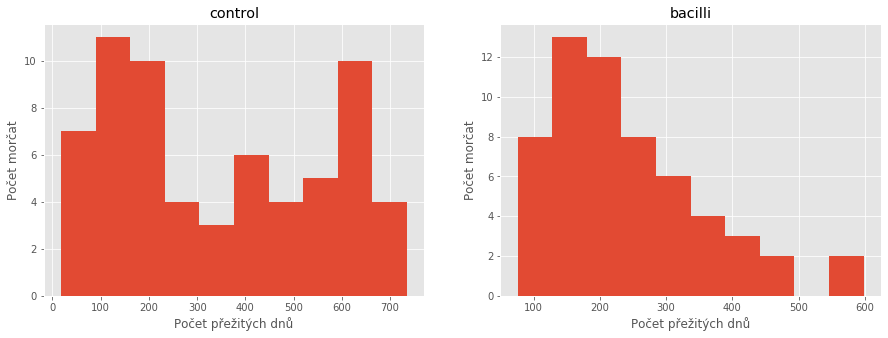

In [3]:
tbl = pd.read_csv("./ex0211.csv", sep=';')
control_df = tbl[tbl['Group'] == 'control']['Lifetime']
bacilli_df = tbl[tbl['Group'] == 'bacilli']['Lifetime']

plt.figure(figsize=(15, 5))
xlabel = 'Počet přežitých dnů'
ylabel= 'Počet morčat'

plt.subplot(121)
control_df.plot.hist(title='control', bins=bins)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.subplot(122)
bacilli_df.plot.hist(title='bacilli',bins=bins)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

### 1) Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Data stručně popište. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení. (1b)

Tento dataset zachycuje informace o přežití morčat (ve dnech) dle typu experimentu, v rámci kterého byla morčata náhodně rozdělena do 2 skupin -> control a bacilli. Morčatům ve skupině bacilli byla dána dávka bacilů tuberkulózy. Následně byla meřena doba přežití dle příslušného experimentu, do kterého byla morčata zařazena.

* Střední hodnotu jsme odhadli pomocí výběrového průměru

* Rozptyl jsme odhadli pomocí výběrového rozptylu

* K výpočtu mediánu jsme použili knihovní funkci

In [4]:
print('Control')
control_mean = control_df.mean()
control_len = len(control_df)
print('Celkový počet dat ve skupině control: ' + str(control_len))
print('Výběrový průměr: ' + str(round(control_mean, 4)))
control_var = (1/(control_len -1))*((pow((control_df - control_mean), 2)).sum())
print('Výběrový rozptyl: ' + str(round( control_var,4)  ))
print('Median: ' + str(control_df.median()))
print('\n')


print('Bacilli')
bacilli_mean = bacilli_df.mean()
bacilli_len = len(bacilli_df)
print('Celkový počet dat ve skupině bacilli: ' + str(bacilli_len))
print('Výběrový průměr: ' + str(round(bacilli_mean,4)))
bacilli_var = (1/(bacilli_len - 1))*(pow((bacilli_df - bacilli_mean), 2)).sum()
print('Výběrový rozptyl: ' + str(round(bacilli_var, 4))   )
print('Median: ' + str(bacilli_df.median()))

Control
Celkový počet dat ve skupině control: 64
Výběrový průměr: 345.2344
Výběrový rozptyl: 49371.6744
Median: 316.5


Bacilli
Celkový počet dat ve skupině bacilli: 58
Výběrový průměr: 242.5345
Výběrový rozptyl: 13907.6918
Median: 214.5


### 2) Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce. (1b)


Po zkoušení různých hodnot jsme nakonec dospěli k závěru, že nejvhodnější počet sloupců v histogramech je 10, jelikož při tomto množství nejsou sloupce zbytečně drobné ani příliš masivní. 

Text(0.5, 1.0, 'bacilli - histogram a hustota')

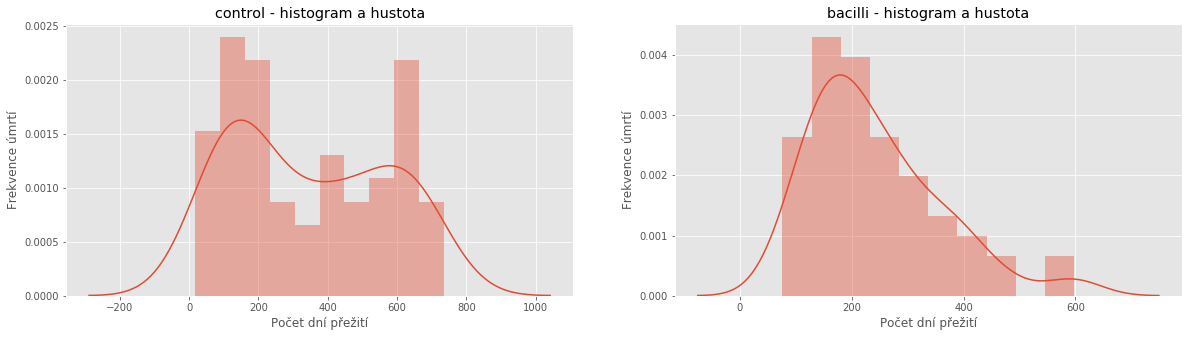

In [5]:
plt.figure(figsize=(20,5), linewidth=5)
xlabel = 'Počet dní přežití'
ylabel= 'Frekvence úmrtí'

# plot displot for control
plt.subplot(121)
sns.distplot(control_df, bins)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('control - histogram a hustota')

# plot displot for bacilli
plt.subplot(122)
sns.distplot(bacilli_df, bins)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('bacilli - histogram a hustota')

Text(0, 0.5, 'Pravděpodobnost úmrtí')

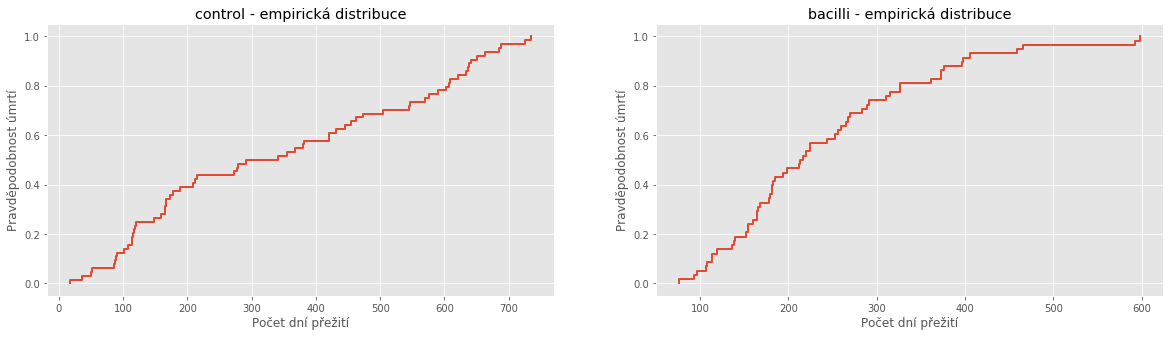

In [6]:
plt.figure(figsize=(20,5), linewidth=5)
xlabel = 'Počet dní přežití'
ylabel= 'Pravděpodobnost úmrtí'

# control
x = ECDF(control_df)
plt.subplot(121)
plt.step(x.x, x.y, linewidth=2, where='post')
plt.title('control - empirická distribuce')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# bacilli
x = ECDF(bacilli_df)
plt.subplot(122)
plt.step(x.x, x.y, linewidth=2, where='post')
plt.title('bacilli - empirická distribuce')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

Distribuční funkce podle definice neobsahuje zde vykreslené svislé čáry a je zprava spojitá (a skokovitá).

Nepodařilo se nám ji vykreslit tímto způsobem.

### 3) Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe. (3b)


Pro obě skupiny jsme získali parametry pomocí fitovací funkce metodou maximální věrohodnosti. Podle nich jsme vykreslili jednotlivé hustoty do příslušných grafů a porovnali je s histogramy naměřených hodnot.
#### Závěr
* pro skupinu control jsme odhadli, že se jedná o uniformní rozdělení
* pro skupinu bacilli jsme odhadli, že se jedná o rozdělení exponenciální  

control
Unif(18.0, 717.0)
Exp(0.0031)
N(345.2344, 48600.2419)

bacilli
Unif(76.0, 522.0)
Exp(0.006)
N(242.5345, 13667.904)



<Figure size 1440x864 with 0 Axes>

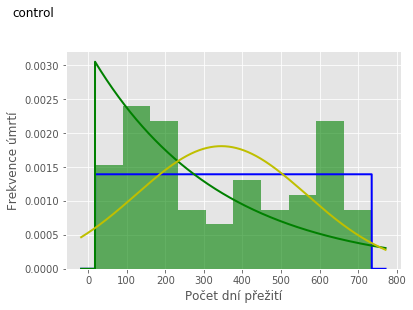

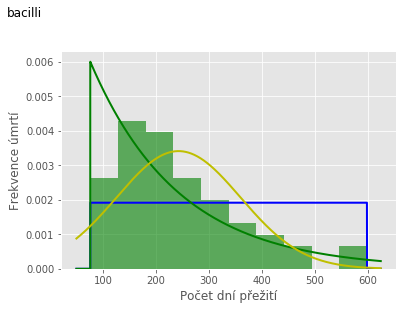

In [7]:
def graf(dataset, desc):
    mu_unif, std_unif = uniform.fit(dataset)
    mu_expo, std_expo = expon.fit(dataset)
    mu_norm, std_norm = norm.fit(dataset)
    print(desc)
    print(f"Unif({mu_unif}, {std_unif})")
    uniform.mean()
    print(f"Exp({round((1/std_expo),4)})")

    print(f"N({mu_norm.round(4)}, {round(pow(std_norm, 2), 4)})\n" )
    text = desc

    f, ax = plt.subplots( )
    xlabel = 'Počet dní přežití'
    ylabel= 'Frekvence úmrtí'
    
    ax.hist(dataset, bins=bins, density=True, alpha=0.6, color='g')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)
    p = uniform.pdf(x, mu_unif, std_unif)
    ax.plot(x, p, 'k', linewidth=2, color="b")
    p = expon.pdf(x, mu_expo, std_expo)
    ax.plot(x, p, 'k', linewidth=2, color="g")
    p = norm.pdf(x, mu_norm, std_norm)
    ax.plot(x, p, 'k', linewidth=2, color="y")
    f.text(0, 1, text, size="large")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return

plt.figure(figsize=(20,12))
graf(control_df, 'control')
graf(bacilli_df, 'bacilli')

### 4) Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.  (1b)

Pomocí knihovních funkcí jsme vygenerovali náhodná data nesoucí rozdělení, která jsme vybrali jako nejvhodnější v předchozím úkolu. Pro porovnání jsme vykreslili grafy dat původních (vpravo) a dat náhodně vygenerovaných (vlevo). Pro orientaci jsme do grafů také vykreslili hustoty původních rozdělení.

Text(0, 0.5, 'Frekvence úmrtí')

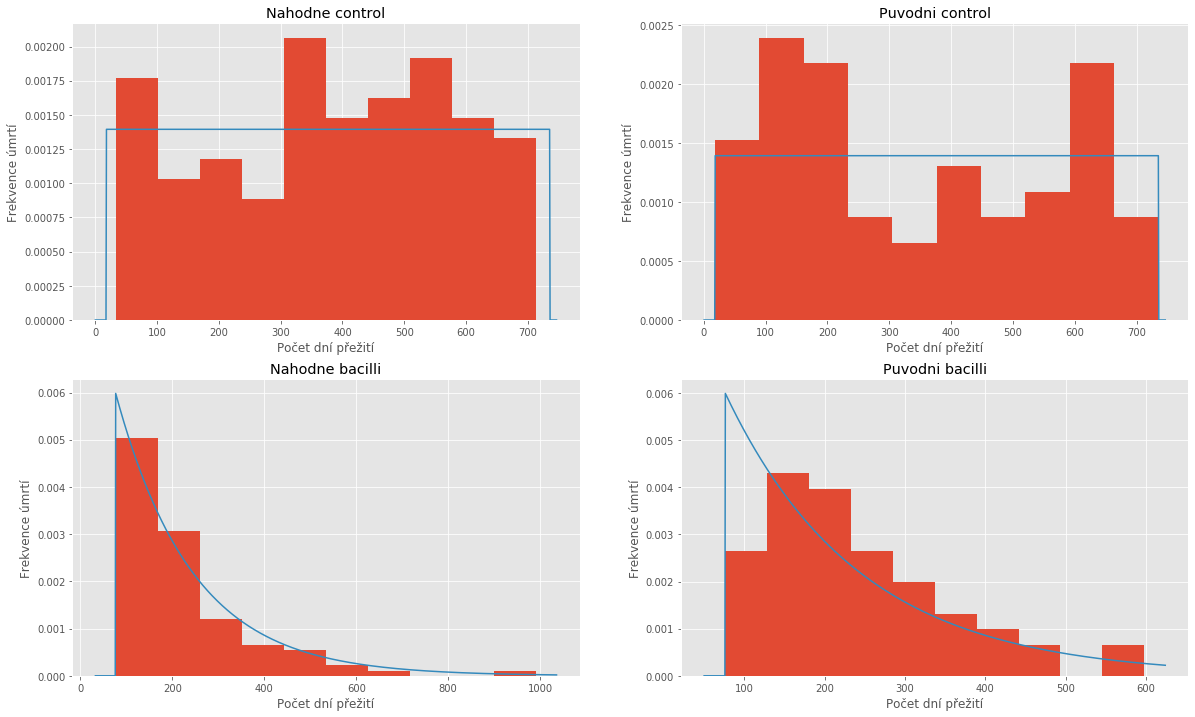

In [9]:
control_model = uniform # control
rcontrol_model = np.random.uniform
bacilli_model = expon # bacilli
rbacilli_model = np.random.exponential

xlabel = 'Počet dní přežití'
ylabel= 'Frekvence úmrtí'

# control
plt.figure(figsize=(20,12))

control_loc, control_std = control_model.fit(control_df)
rnd = rcontrol_model(control_loc, control_std, 100)
plt.subplot(221)
plt.hist(rnd,bins, density=True)
xmin, xmax = plt.xlim()
plt.plot(np.linspace( xmin ,xmax, 1000), control_model.pdf(np.linspace(xmin ,xmax, 1000) , control_loc, control_std))
plt.title('Nahodne control')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.subplot(222)
plt.hist(control_df, bins, density=True)
plt.plot(np.linspace(xmin ,xmax, 1000), control_model.pdf(np.linspace(xmin ,xmax, 1000) , control_loc, control_std))
plt.title('Puvodni control')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# bacilli
bacilli_loc, bacilli_std = bacilli_model.fit(bacilli_df)
rnd = rbacilli_model( bacilli_std, 100) + bacilli_loc
plt.subplot(223)
plt.hist(rnd,bins, density=True)
xmin, xmax = plt.xlim()
plt.plot(np.linspace( xmin ,xmax, 1000), bacilli_model.pdf(np.linspace(xmin ,xmax, 1000) , bacilli_loc, bacilli_std))
plt.title('Nahodne bacilli')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.subplot(224)
plt.hist(bacilli_df, bins, density=True)
xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin ,xmax, 1000), bacilli_model.pdf(np.linspace(xmin ,xmax, 1000) , bacilli_loc, bacilli_std))
plt.title('Puvodni bacilli')
plt.xlabel(xlabel)
plt.ylabel(ylabel)



### 5) Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu. (1b)

Pomocí vzorců z přednášek jsme získali horní a dolní mez daných intervalů se spolehllivostí 95 %.
Dané hodnoty jsme zanesli do grafu společně s histogramem a distribuční funkcí. 
Jelikož neznáme rozptyl, použili jsme pro výpočet Studentovo-t rozdělení. Díky CLV bylo možné použít tento postup pro sestavení intervalu odhadu i pro jiné, než normální rozdělení. Spolehlivost intervalu je poté přibližná.

95% konfidenční interval pro control je (289.7311, 400.7376).
95% konfidenční interval pro bacilli je (211.5261, 273.5428).


Text(0, 0.5, 'Frekvence úmrtí')

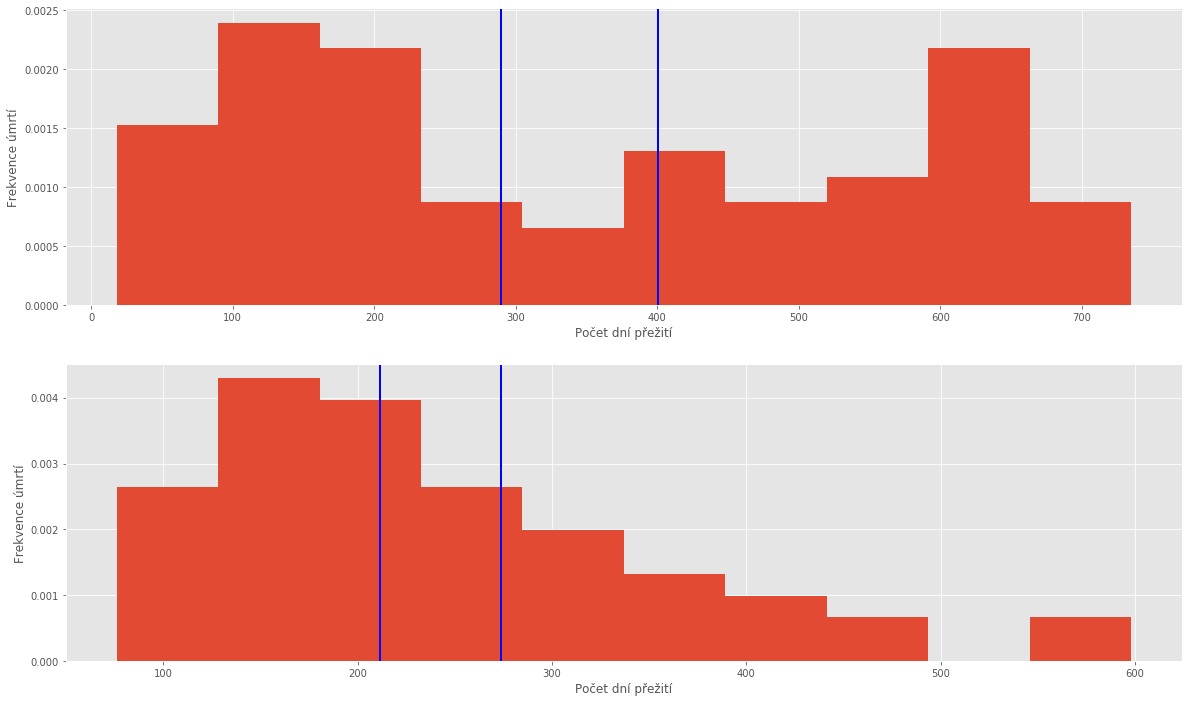

In [11]:
plt.figure(figsize=(20,12))
xlabel = 'Počet dní přežití'
ylabel= 'Frekvence úmrtí'
alpha = 0.05

#(L < X < U)
control_L = control_mean - t.isf(alpha/2, len(control_df)-1) * np.sqrt(control_var / len(control_df))
control_U = control_mean + t.isf(alpha/2, len(control_df)-1) * np.sqrt(control_var / len(control_df))

bacilli_L = bacilli_mean - t.isf(alpha/2, bacilli_len-1 ) * np.sqrt(bacilli_var / bacilli_len)
bacilli_U = bacilli_mean + t.isf(alpha/2, bacilli_len-1 ) * np.sqrt(bacilli_var / bacilli_len)

plt.subplot(211)

print("95% konfidenční interval pro control je ({}, {}).".format(round(control_L, 4), round(control_U,4)))
hist = control_df.plot.hist(density=1, bins=10)
hist.axvline(x=control_L, ymin=0, ymax=1, color='b',  linewidth=2)
hist.axvline(x=control_U, ymin=0, ymax=1, color='b', linewidth=2)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.subplot(212)

print("95% konfidenční interval pro bacilli je ({}, {}).".format(round(bacilli_L,4), round(bacilli_U,4)))
hist = bacilli_df.plot.hist(density=1, bins=10)
hist.axvline(x=bacilli_L, ymin=0, ymax=1, color='b', linewidth=2)
hist.axvline(x=bacilli_U, ymin=0, ymax=1, color='b', linewidth=2)
plt.xlabel(xlabel)
plt.ylabel(ylabel)


### 6) Pro každou skupinu zvlášť otestujte na hladině významnosti 5% hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru. (1b)


Pro test jsme použili výsledek předešlého úkolu.<br>
Nulová hypotéza H0: `EX = K`<br>
Alternativní hypotéza: `EX != K`<br>
Hodnota K se velmi liší od námi odhadnuté střední hodnoty, proto je pravděpodobnost, že `K` je rovno střední hodnotě v obou případech velmi malá.<br>
Z výsledku předchozího úkolu je očividné, že hodnota `K` není prvkem konfidenčního intervalu ani v jednom případě. Dané nulové hypotézy tedy zamítáme na hladině významnosti 5 % ve prospěch HA. 

In [ ]:
spolehlivost = 0.05

if( control_L < K < control_U) :
    print("Na hladině významnosti 5 % nezamítáme pro H0 pro Control.")
else:
    print("Na hladiěně významnosti 5 % zamítáme pro H0 pro Control.")

if( bacilli_L < K < bacilli_U) :
    print("Na hladiěně významnosti 5 % nezamítáme pro H0 pro Bacilli.")
else:
    print("Na hladiěně významnosti 5 % zamítáme pro H0 pro Bacilli.")



### 7) Na hladině spolehlivosti 5% otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému. (2b)


Použili jsme knihovní funkci `ttest`, která porovnává střední hodnoty dvou datasetů a zjistili jsme, že hodnota `p` je menší než `alfa`, proto danou hypotézu zamítáme. Funkce `ttest` vrací `p` pro oboustranný interval spolehlivosti,a proto bylo potřeba vydělit `p` dvěma, jelikož potřebujeme počítat s horním intervalem spolehlivosti.

Testujeme H0: `EXBacilli` **=** `EXControl` <br>
proti HA: `EXBacilli` **<** `EXControl`

Jako nulovou hypotézu H0 jsme zvolili H0: `EXBacilli` **=** `EXControl` oproti alternativní hypotéze HA: `EXBacilli` **<** `EXControl`.

Tuto hypotézu jsme zvolili proto, abychom ověřili zda se půměrná doba přežití morčat s bacilem tuberkulózy zmenší.

V případě, že hodnota `p/2` je menší než `alfa` H0 zamítáme ve prospěch HA na hladině spolehlivosti 5 %.

In [12]:
alfa = 0.05
stats, p = ttest_ind(bacilli_df, control_df, equal_var=False)
print( "Hodnota p/2 je {}. ".format(round(p/2,4)))
if(p/2 < alfa):
    print("Na hladině významnosti 5 % zamítáme H0 ve prospěch HA.")
else:
    print("Na hladině významnosti 5 % nezamítáme H0.")


Hodnota p/2 je 0.0008. 
Na hladině významnosti 5 % zamítáme H0 ve prospěch HA.
